<h2 style="color:green" align="center">Predicting if a person would buy life insurnace based on his age using logistic regression</h2>

Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't). 

## #Logistic regression is the probability for the occurence of the favourable outcomes

In [8]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [9]:
df = pd.read_csv("https://raw.githubusercontent.com/sravanirachamalla/MLA2021/main/Logistic%20Regression/insurance_data.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               27 non-null     int64
 1   bought_insurance  27 non-null     int64
dtypes: int64(2)
memory usage: 560.0 bytes


,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [10]:
df.bought_insurance.value_counts()

1    14
0    13
Name: bought_insurance, dtype: int64

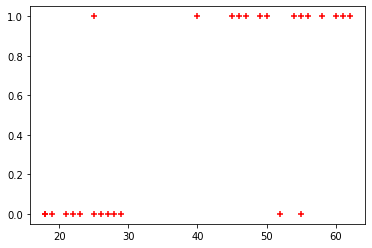

In [11]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [12]:
import statsmodels.api as sm
Y = df.bought_insurance
X = sm.add_constant( df[['age']] )

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
Y,
test_size = 0.3,
random_state = 42)

In [14]:
X_test

,const,age
8,1.0,62
13,1.0,29
9,1.0,61
21,1.0,26
0,1.0,22
11,1.0,28
16,1.0,25
17,1.0,58
12,1.0,27


In [15]:
y_test

8     1
13    0
9     1
21    0
0     0
11    0
16    1
17    1
12    0
Name: bought_insurance, dtype: int64

**Building Logistic Regression Model**

In [16]:
import statsmodels.api as sm
logit = sm.Logit(y_train, X_train)
logit_model = logit.fit()

Optimization terminated successfully.
         Current function value: 0.395966
         Iterations 7


**Printing Model Summary**

In [17]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            Pseudo R-squared: 0.424    
Dependent Variable: bought_insurance AIC:              18.2548  
Date:               2021-10-16 14:42 BIC:              20.0355  
No. Observations:   18               Log-Likelihood:   -7.1274  
Df Model:           1                LL-Null:          -12.365  
Df Residuals:       16               LLR p-value:      0.0012095
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     7.0000                                      
------------------------------------------------------------------
         Coef.    Std.Err.      z      P>|z|     [0.025     0.975]
------------------------------------------------------------------
const   -5.3973     2.6243   -2.0567   0.0397   -10.5408   -0.2537
age      0.1362     0.0582    2.3409   0.0192     0.0222    0.2503
================================================================

"""

**Predicting on Test Data**

In [18]:
y_pred_df = pd.DataFrame( { "actual": y_test,
"predicted_prob": logit_model.predict(
sm.add_constant( X_test ) ) } )

In [20]:
y_pred_df.sample(5, random_state = 42)
# close to 1 is high occurence and vice-versa with value close to 0.

,actual,predicted_prob
17,1,0.924354
13,0,0.190447
11,0,0.170325
8,1,0.954691
12,0,0.151931


In [21]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map(
lambda x: 1 if x > 0.5 else 0)

y_pred_df.sample(5, random_state = 42)

,actual,predicted_prob,predicted
17,1,0.924354,1
13,0,0.190447,0
11,0,0.170325,0
8,1,0.954691,1
12,0,0.151931,0


**Creating a Confusion Matrix**

In [22]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
from sklearn import metrics

In [25]:
def draw_cm( actual, predicted ):
## Cret
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sn.heatmap(cm, annot=True, fmt='.2f',
                xticklabels = ["Does't buy insurance", "Buy insurance"] ,
                yticklabels = ["Does't buy insurance", "Buy insurance"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    # CFM helps in how much the model is accurate 

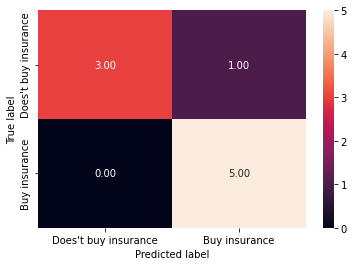

In [26]:
draw_cm( y_pred_df.actual,
y_pred_df.predicted )

**Measuring Accuracies**

In [27]:
print( metrics.classification_report( y_pred_df.actual,
y_pred_df.predicted ) )

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.75      0.86         4

    accuracy                           0.89         9
   macro avg       0.92      0.88      0.88         9
weighted avg       0.91      0.89      0.89         9



**ROC & AUC**

In [28]:
def draw_roc( actual, probs ):
    fpr, \
    tpr, \
    thresholds = metrics.roc_curve( actual,
                                    probs,
                                    drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()
    
    return fpr, tpr, thresholds

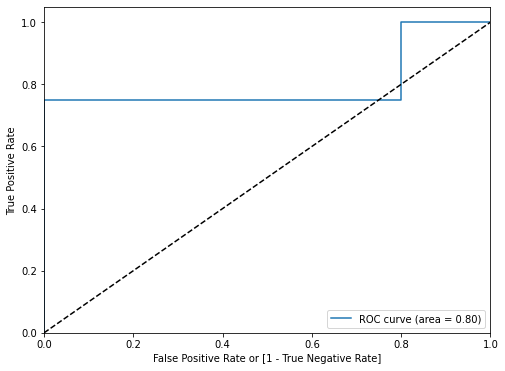

In [29]:
fpr, tpr, thresholds = draw_roc( y_pred_df.actual,
y_pred_df.predicted_prob)
# If the ROC rate is greater than 70%, we consider to be the model is accurate and the data is in the true positive rate

In [30]:
auc_score = metrics.roc_auc_score( y_pred_df.actual,
y_pred_df.predicted_prob )
round( float( auc_score ), 2 )

0.8

**0.80 is more than 0.5 which means person with 24 will buy the insurance**